# 첫번째. R을 이용한 간단한 딥 러닝 예제 (Simple Modeling the Final Energy Predictor by using R Language)
<hr/>
## 예제 목표:
  이번 예제에서는 Materials Scientific Community에 구축되어 있는 Open Quantum Materials Database [[1]](http://dx.doi.org/10.1007/s11837-013-0755-4)[[2]](http://dx.doi.org/10.1038/npjcompumats.2015.10) ([OQMD](http://www.oqmd.org), NorthWestern Univ.)의 DFT 계산 데이터를 활용하여 소재 물성 예측 모델을 간단히 구성한다. 딥 러닝 학습은 Supervised(지도학습) 방식이 사용되며 Regression 을 통해 만들어지는 모델을 활용해 scalar 결과 값을 예측한다. 모델의 성능 검증을 위해 5-Fold Cross Validation(교차검증) 방안을 사용한다. 마지막으로, 만들어진 모델을 저장하여 차후 예측 모델의 서비스에서 활용될 수 있다.

### Overview
  예제의 딥 러닝 학습은 크게 다음의 4가지 파트로 구성된다.
1. 데이터 로딩: 입력 값(Features)과 출력 값(Labels)이 저장된 텍스트 형태의 데이터 파일을 로딩한다.
2. 데이터 전처리: 머신 러닝 학습에 적합한 형태로 로딩된 데이터를 변환한다.
3. 기계 학습 및 최적 모델 생성: 다양한 파라미터 값을 조정하여 최적의 모델을 찾는다.
4. 결과 값 분석: 모델의 객관적 성능 평가 및 원인과 결과를 분석한다. 필요시 위의 과정을 반복한다.
<hr/>
###### Comments
입력 값(input): 본 예제에서는 Features 라는 용어를 사용. 연구자의 성향 및 설명의 용이에 따라 Variables, Descriptors, Importances 로 명시하기도 함.

  출력 값(output): 본 예제에서는 Label 이라는 용어를 사용.

<hr/>
## 1. 데이터 로딩
  미리 정의된 csv 파일 형태로 저장된 텍스트 데이터를 메모리에 로드한다. 해당 데이터는 Inorganic compounds 의 Formula Information 만으로 구성된 단순한 형태의 데이터이다. 차후의 예제에서 더 많은 종류의 Features를 추가하여 최종 성능에 미치는 영향을 비교한다.
  
  
  학습에 사용되는 1) 입력 값(Features)으로는 Formula information, 이에 상응하는 2) 출력 값(Label)으로는 Final energy/atom이 학습된다. 1차 분석 시 전체 학습 데이터 수에 따른 성능 비교를 위해 먼저 50%의 데이터만 활용한다. 2차 분석에 100%의 데이터를 활용하여 그 차이를 비교한다.

In [1]:
# path setting
currentPath = "./"
dataPath = "data/"
figPath = ".figures/"
modelPath = "models/"

dataPath <- paste(currentPath, dataPath, sep="")
figPath <- paste(currentPath, figPath, sep="")

In [2]:
# 전체 data 중 training에 80%, testing에 20%에 사용.
seperatingRate = 0.8
# 학습 데이터량에 따른 성능 비교를 위해 먼저 50%의 데이터만 사용.
maxSizeRate = 0.5

# 변수 초기화 후 데이터 로딩
fileName = "oqmd-simple.csv"
all_data = 0
all_data = read.csv(paste(dataPath,fileName, sep=""), sep=",", header=TRUE)
attach(all_data)

The following object is masked from package:base:

    F



In [3]:
# 데이터 확인
all_data

finalenergyperatom,Ac,Ag,Al,Ar,As,Au,B,Ba,Be,⋯,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
-4.468631,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,3,NA,NA,NA,NA,NA,NA,NA,NA
-4.511592,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-0.029181,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-4.804203,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-4.648720,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-0.001324,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-8.682485,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
-0.962353,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-11.610272,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-8.940979,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1,NA,NA,NA,NA,NA,NA


R의 nrow(), length() 함수를 이용하여 데이터의 열의 수(# of rows), 행의 수(# of columns) 를 확인해보자. (R 구버전의 경우 len())

해당 데이터는 1개의 열이(finalenergyperatom) 출력 값인 Label 이므로 89개 열들이(Ac ~ Zr) 입력 값인 Features로 사용될 것이다.

In [4]:
# 총 데이터의 수 (rows)
nrow(all_data)

# 총 입출력 레이블의 수 (columns)
length(all_data)

[1] 120543

[1] 90

<hr/>
## 2. 데이터 전처리
  머신 러닝의 학습에 있어서 데이터 전처리(pre-processing and cleaning data)는 학습의 효율성 및 생성 모델의 성능에 매우 중요한 역할을 수행한다. Raw data 는 종종 이상 값(Noisy), 정보 손실(Incomplete), 또는 데이터 불일치(Inconsistent)등이 발생할 수 있으며 이러한 문제들을 효과적으로 처리해야 잘못된 데이터로 인해 잘못된 결과물이 만들어지는 문제(Garbage-In-Garbage-Out Problem)를 피할 수 있다.
  
  그리고 학습의 시간을 단축하고 효율적인 학습을 위해 다음의 방안들이 사용된다.
  
  데이터 정규화(Normalization) - Min-Max normalization, Z-score normalization, 그리고 Decimal scaling 등의 방안을 사용해 데이터 수치를 특정 영역(range)로 재조정(re-scale)하여 계산량을 줄이고 최적점의 수렴을 빠르게 도와준다.
  
  또는 표준화(Standardization) - 데이터 수치와 평균의 오차를 표준편차로 나누어줌으로서 다차원 값들을 비교, 분석하기 쉽게 만들어준다.
  
  정규화(Normalization, re-scaling)의 예: \\( x'=\frac{x-min(x)}{max(x)-min(x)} \\),
  표준화(Standarization)의 예: \\( x'=\frac{x-\bar{x}}{\sigma} \\)

좋은 소식은, 현재까지 대부분의 딥 러닝 프레임워크/패키지/라이브러리들이 전처리에 관련된 다양한 함수들을 손쉬운 옵션 또는 Automatic 옵션으로 제공하고 있다는 점이다. 제공되는 함수 외에 다른 기능이 필요하다면 다음과 같이 간단히 구현하여 적용할 수 있다. 예를 들어, 본 예제에서는 Na 값의 데이터를 0 으로 전환하는 함수를 적용했다.

In [5]:
# 함수 선언: NaN data to zero
na.zero <- function (x) {
    x[is.na(x)] <- 0
    return(x)
}

# 데이터에 적용
all_data <- na.zero(all_data)

그리고 로드한 데이터를 학습시킬 데이터(Training dataset)와 검증에 사용할 테스트 데이터(Testing dataset)으로 분리하는 작업을 수행한다. 우리는 앞서 120,543 개의 데이터를 로드하였고 먼저 이들 중 50%의 데이터인 60,271 개의 데이터만을 먼저 사용한다.

전체 60,271 개의 데이터 중 80%는 Train_data, 나머지 20%는 Test_data에 각각 샘플링하여 배분한다. (앞서 정의한 seperatingRate, maxSizeRate 변수 값을 조정함으로서 데이터 양을 조정하여 쉽게 모델링 할 수 있다.)

In [6]:
# down scaling
seperatingValue = 0
seperatingValue = floor(nrow(all_data)*maxSizeRate*seperatingRate)

# train/test data 분리
set.seed(1234)
all_data_reduced = all_data[sample(nrow(all_data)*maxSizeRate), ]
train_data = all_data_reduced[1:seperatingValue, ]
test_data = all_data_reduced[(seperatingValue+1):nrow(all_data_reduced), ]

In [7]:
nrow(train_data)
nrow(test_data)

[1] 48217

[1] 12054

이제 48,217 개의 Train_data 그리고 12,054 개의 Test_data를 얻었다. 우리가 앞으로 사용할 H2O 딥 러닝 패키지[[3]](http://h2o.ai)[[4]](http://h2orelease.s3.amazonaws.com/h2o/latest_stable_Rdoc.html)는 표준화 과정을 기본 옵션으로 제공하므로 따로 정규화나 표준화 과정을 거칠 필요가 없다.

<hr/>
## 3. 기계 학습 및 최적 모델 생성
  기본적인 준비가 되었으니 본격적으로 목표했던 예측 모델을 만들어보자. H2O 패키지의 경우 dataframe type의 데이터를 H2O frametype으로 변환하는 casting이 필요하다.

In [8]:
# 라이브러리 호출
library(h2o)
# h2o framework initialize
h2o.init(nthreads = 2)

# R dataframe type의 데이터를 h2o dataframe 으로 casting
training_frame = as.h2o(train_data)
testing_frame = as.h2o(test_data)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         22 minutes 1 seconds 
    H2O cluster version:        3.16.0.2 
    H2O cluster version age:    17 days  
    H2O cluster name:           H2O_started_from_R_edisonadm_qyl456 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   20.75 GB 
    H2O cluster total cores:    32 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.2 (2017-09-28) 

  |======================================================================| 100%
  |======================================================================| 100%


R 언어의 경우 1열, 1행부터 메모리에 직접 access하므로 y.dep 변수에 1행(Final energy per atom), 그리고 x.indep에 2행~90행(Ac ~ Zr)을 정의한다. 

In [9]:
y.dep = 1
x.indep = c(2:length(testing_frame))

# print
y.dep
x.indep

[1] 1

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
[76] 77 78 79 80 81 82 83 84 85 86 87 88 89 90

h2o.deeplearning 함수 중 Loss function(= cost function) 은 Automatic 으로, Hidden layer는 32x16으로 세팅했다. 이를 그림으로 표현하면 다음과 같다.

![fig_simple_nn_model](./figures/simple_nn_model.jpg)
<center>[본 예제의 Neural Network 모델]</center>



그리고 nfold 는 Training 시의 성능을 검증을 위해 K-Fold Cross Validation (교차검증) 방안을 사용하는 옵션이다. nfold = 5일 경우 Training dataset 을 5개 subsets 으로 다시 나누어 38500여개의 dataset 을 학습하고 나머지 9600여개 dataset으로 성능을 검증하는 프로세스를 5회 반복해 그 평균으로 모델의 일반적인 성능(General performance)을 검증한다. 마지막으로 epoch 옵션은 주어진 Training dataset 을 몇 회 학습할지에 관한 옵션이다. 그 외에도 다른 옵션 및 별도의 기능들에 관해서는 [4]에서 상세히 확인할 수 있다.

![fig_5fold_cross_validation](./figures/5fold_cross_validation.jpg)
<center>[5-Fold Cross Validation 의 학습 및 성능 평가 과정 (그림출처: http://blog.goldenhelix.com/goldenadmin/cross-validation-for-genomic-prediction-in-svs/)]</center>

In [10]:
# 모델 생성: tmodel (약 1~2분 소요. 개발 머신의 성능에 따라 다를 수 있음)
tmodel = h2o.deeplearning(x = x.indep, y = y.dep, training_frame = training_frame, hidden = c(32,16), loss = "Automatic", nfolds = 5, epochs = 10)

# testing_frame 내에서 실제 label 값과 모델 예측값과의 차이들을 비교한 성능 평가
tperf = h2o.performance(tmodel, testing_frame)

# 만들어진 모델(tmodel)에 학습에 사용되지 않았던 testing_frame (12,054 dataset)을 label 값을 제외하고 입력으로 넣었을 때 예측된 결과 값: tpredicted
tpredicted = h2o.predict(tmodel, testing_frame)

  |======================================================================| 100%
  |======================================================================| 100%


<hr/>
## 4. 결과 값 분석
  딥 러닝을 사용한 예측 모델이 만들어졌다. 다각도의 분석을 통해 개발 모델의 객관적인 성능을 평가하고 개선된 모델을 만들어보자. R에서 H2O 모델을 호출하면 다음의 정보들을 확인할 수 있다.
  
  해당 네트워크 모델은 89개의 입력 값으로부터 (32x16)의 Hidden layer를 거쳐 Linear output 을 학습시키며, Final energy/atom 예측을 목표로 하는 Regression 모델이다. Loss function 으로는 Quadratic loss가 선택되었으며, dropout은 0%, 그리고 mini-batch size가 1로서 매 레코드마다 학습으로 인한 업데이트가 발생했음을 알 수 있다.
  
  그외에는 [4] 에서 알 수 있듯이, Default Learning rate은 0.005, 가변 Learning rate 이 적용되어 있으며 원한다면 해당 옵션의 수정을 통해 다른 방식으로 학습시킬 수도 있다. 만일 딥 러닝을 제대로 공부하고자 한다면 각각의 옵션들이 어떠한 의미를 갖는지, 개발 모델에 적용하였을 때 결과에 어떻게 반영될지 상세히 알아보고 여러 번 테스트해 볼 필요가 있다. 본 예제에서 사용된 H2O 딥 러닝 패키지가 현재까지 제안 또는 개발된 모든 알고리즘을 전부 반영할 수는 없지만, 직접 개발할 필요 없이 단순한 옵션 변경만으로 다양한 방식의 학습 방법을 적용해 볼 수 있는 것은 분명 매력적이다. 그리고 variable_imporatnce 옵션을 사용한다면 학습 시간은 조금 더 소요되지만 입력 값들 중 어떤 Feature 들이 예측 값 형성에 크게 기여했는지를 쉽게 확인할 수 있다. 해당 내용은 다음 실험에서 확인할 수 있다.
  
  데이터 샘플링 결과에 따라 다소 차이가 있을 수 있지만, 이번에 만들어진 모델은 학습 시 MAE (Mean Absolute Error)는 0.351, 5-fold CV 의 평균 MAE는 0.392로 나타났다. 이 성능 지표들은 모두 전체 dataset 중 학습에 사용되는 80%의 데이터에 관한 결과이다. 학습에 사용되지 않았던 20%의 데이터를 가지고 만들어진 모델에 적용해보면 새로운 예측 값들을 얻을 수 있고(tpredicted), 이에 대한 성능 평가는 h2o.performance() 함수를 통해 쉽게 얻을 수 있다(tperf). 아래의 결과를 통해 개발 모델의 객관적인 성능이 MAE 0.375 정도의 수준을 나타냄을 알 수 있다.

In [11]:
tmodel
tperf

Model Details:

H2ORegressionModel: deeplearning
Model ID:  DeepLearning_model_R_1513582449475_2 
Status of Neuron Layers: predicting finalenergyperatom, regression, gaussian distribution, Quadratic loss, 3,425 weights/biases, 52.2 KB, 551,190 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    89     Input  0.00 %                                              
2     2    32 Rectifier  0.00 % 0.000000 0.000000  0.113652 0.149532 0.000000
3     3    16 Rectifier  0.00 % 0.000000 0.000000  0.021979 0.026959 0.000000
4     4     1    Linear         0.000000 0.000000  0.002236 0.001945 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2   -0.008896   0.196383  0.372330 0.289995
3   -0.064236   0.201006  0.952114 0.141272
4    0.005328   0.172578  0.067065 0.000000


H2ORegressionMetrics: deeplearning
** Reported on training data. **
** Metrics reported on temporary trainin

H2ORegressionMetrics: deeplearning

MSE:  12.15502
RMSE:  3.486404
MAE:  0.3752038
RMSLE:  NaN
Mean Residual Deviance :  12.15502


<hr/>H2O는 Training Score 에 따른 손쉬운 그래프를 제공한다. Overfitting이 되지 않도록 주의하면서 더 깊고/넓은 모델로, 또는 Learning rate 등을 조절해보며 최적의 값을 찾아내는 Parameter Optimization 과정을 통해 더욱 더 정교한 모델을 만들어 볼 수 있다.

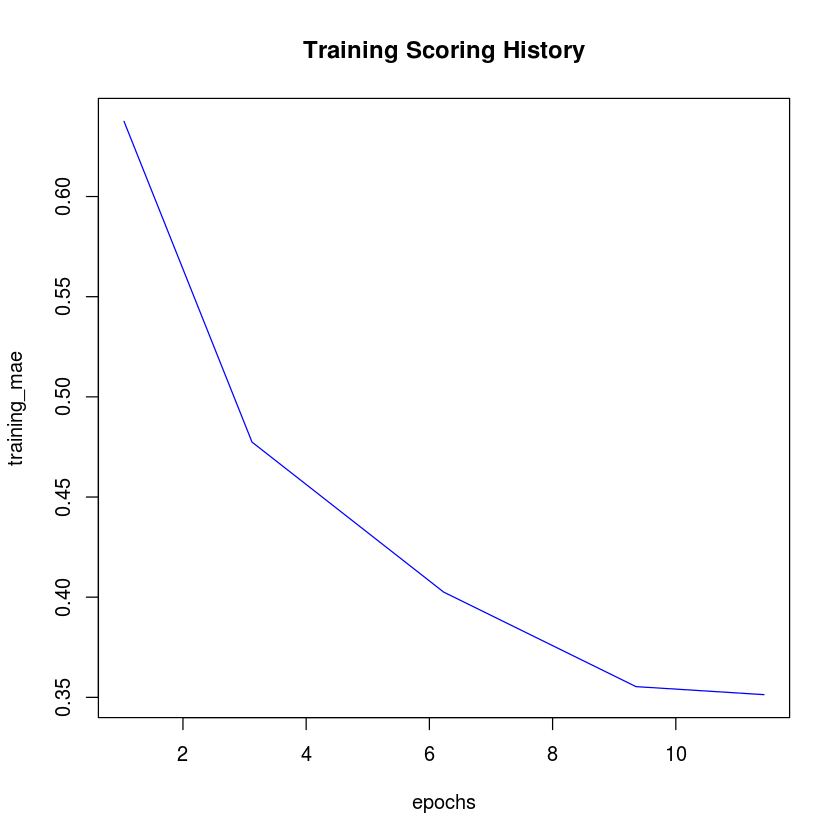

In [12]:
plot(tmodel,metric='mae')

<hr/>다음은 Prediction-error-plotting을 사용하여 예측 값 vs. 실제값의 가시화를 통한 분석이다. 그래프의 x축은 실제 Label 값(Actual final energy/atom)이고 y축은 개발된 모델이 생성해낸 예측값(Predicted final energy/atom)이다. Testing_frame 12,054 개의 데이터 중 대부분의 값들이 실제값과 예측값이 일치하는 실선 근처에 위치한다. 하지만 몇몇 값들은 오차가 매우 크고, 오차들 중 대부분은 예측치 대비 실제값이 현저하게 큰 경우가 대다수이다. 즉, 데이터 자체에 일상적인 분포를 벗어난 매우 큰 값(Outliers)들이 존재한다는 것이다.

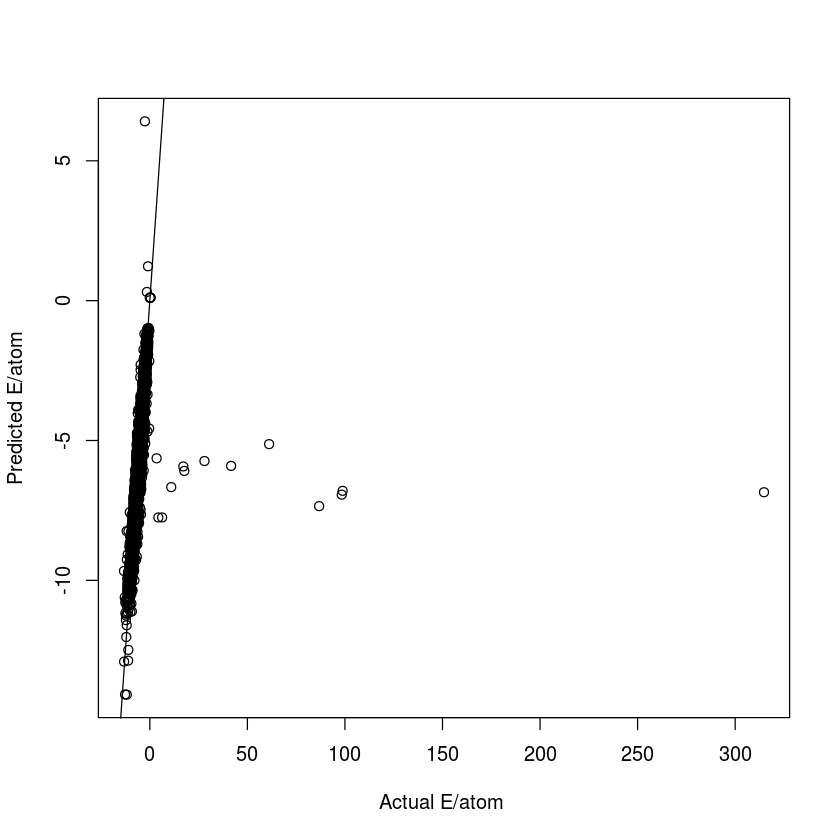

In [13]:
fepa <- as.data.frame(testing_frame[y.dep])
fepa<- as.data.frame(fepa)
forecast_y_t_hat = tpredicted
forecast_y_t_hat <- as.data.frame(forecast_y_t_hat)


names(fepa)[1] <- c("Actual E/atom ")
names(forecast_y_t_hat) <-c("Predicted E/atom")

vs <- cbind(fepa, forecast_y_t_hat)

plot(vs)
abline(a=0,b=1)

<hr/>밀집 지역만을 조금 더 상세히 살펴보면, 예측 값이 실제 값과 어느정도는 잘 일치하고 있음을 볼 수 있다.

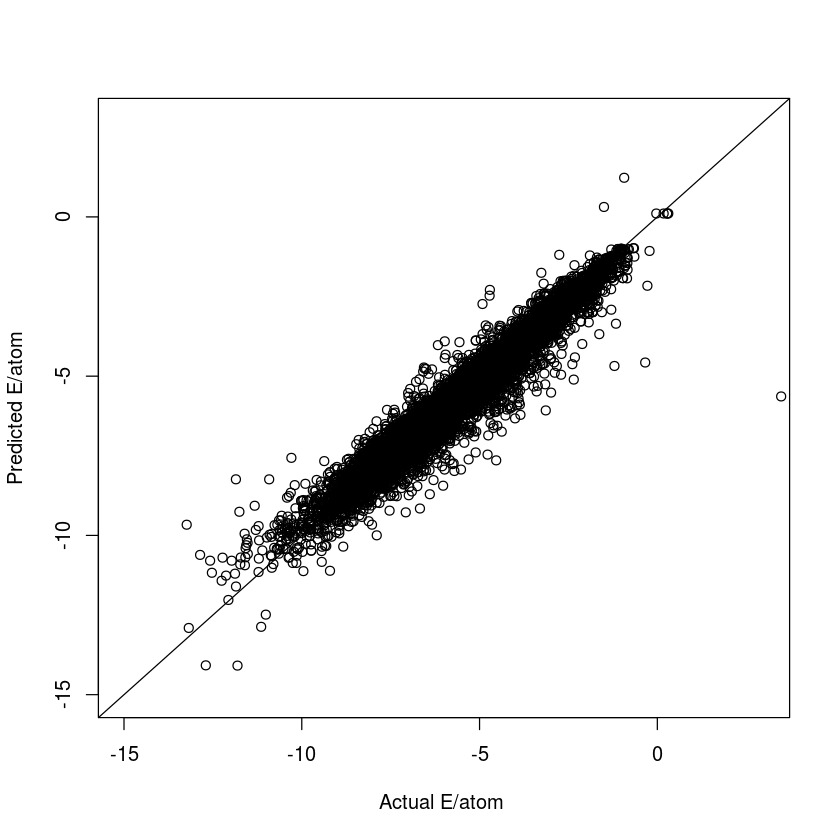

In [14]:
plot(vs, ylim=c(-15, 3), xlim=c(-15,3))
abline(a=0,b=1)

<hr/>
### 일반적으로 개발 모델의 성능을 높이려면, 

1. 더 많은 데이터를 학습하거나 (Quantity Control),

2. 데이터의 수준을 높게 유지하거나 (Quality Control),

3. 예측에 영향을 많이 줄 수 있는 강력한 Features 또는 그 조합을 추가하거나 (Feature Engineering),

4. 최적화된 학습 파라미터를 찾거나 (Parameter Optimizing),

5. 또는 유사한 성질을 갖는 데이터를 분리하여 높은 수준의 특화된 모델 (Filtering)을 개발,

하는 등의 방안들을 적용해 볼 수 있다. 현재 사용된 입력 데이터는 Ac ~ Zr 까지의 단순한 Formula Information 만을 사용했다. 이를 더 확장하여, Spacegroup, Structural Information, Stoichiometric values, Max and Min values, 그리고 Electronic structure values 등의 다양화된 입력을 추가한다면 어떨까? 혹은 소재의 특성을 잘 표현할 수 있는 새로운 Descriptor등을 적용하여 데이터를 구성하면 어떨까? 이와 같은 Feature Engineering 에 관한 문제는 다음 번 예제에서 상세히 다루고자 한다.

그리고 지금껏 현재 우리가 가지고 있는 데이터의 일부분만을 가지고 모델을 개발했다. 만일 더 많은 데이터를 사용한다면 어떤 결과를 얻을 수 있을까? 어느 정도의 데이터 양이 딥 러닝 방법에 적절한 수준일까? 사실 상 이러한 질문들의 정답은 없다. 하지만 예제의 마지막 과정으로, 데이터 양이 증가했을 때 이전 모델과의 성능의 차이가 어떻게 되는지 직접 확인해보자. 그리고 만들어진 모델을 파일로 저장하고 필요시 이를 다시 불러와서 웹에 배포하고, 서비스하는 예제에 대하여 다루어본다.

![fig_why_deep_learning](./figures/whydeeplearning.jpg)
<center>[참고: 딥 러닝 성능과 데이터 양의 관계] (그림출처: Andrew Ng, Lecture Note on CS229 Machine Learning, Stanford Univ.</center>

In [15]:
# 전체 data 중 training에 80%, testing에 20%에 사용.
seperatingRate = 0.8
# 이번에는 데이터 전부를 사용함
maxSizeRate = 1

# down scaling
seperatingValue=0
seperatingValue = floor(nrow(all_data)*maxSizeRate*seperatingRate)

set.seed(1234)
all_data_reduced = all_data[sample(nrow(all_data)*maxSizeRate), ]
train_data_full = all_data_reduced[1:seperatingValue, ]
test_data_full = all_data_reduced[(seperatingValue+1):nrow(all_data_reduced), ]

In [16]:
nrow(train_data_full)
nrow(test_data_full)

[1] 96434

[1] 24109

In [17]:
training_frame_full = as.h2o(train_data_full)
testing_frame_full = as.h2o(test_data_full)

tmodel_full = h2o.deeplearning(x = x.indep, y = y.dep, training_frame = training_frame_full, hidden = c(32,16), loss = "Automatic", nfolds = 5, epochs = 10, variable_importance = TRUE)

tpredicted_full = h2o.predict(tmodel_full, testing_frame_full)
tperf_full = h2o.performance(tmodel_full, testing_frame_full)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [18]:
tmodel_full
tperf_full

Model Details:

H2ORegressionModel: deeplearning
Model ID:  DeepLearning_model_R_1513582449475_3 
Status of Neuron Layers: predicting finalenergyperatom, regression, gaussian distribution, Quadratic loss, 3,425 weights/biases, 52.2 KB, 1,028,900 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    89     Input  0.00 %                                              
2     2    32 Rectifier  0.00 % 0.000000 0.000000  0.041424 0.118352 0.000000
3     3    16 Rectifier  0.00 % 0.000000 0.000000  0.007182 0.008921 0.000000
4     4     1    Linear         0.000000 0.000000  0.000366 0.000391 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2   -0.003729   0.247011  0.313794 0.398605
3   -0.059213   0.212117  1.073159 0.155345
4   -0.012828   0.190004 -0.106373 0.000000


H2ORegressionMetrics: deeplearning
** Reported on training data. **
** Metrics reported on temporary train

H2ORegressionMetrics: deeplearning

MSE:  56.89783
RMSE:  7.543065
MAE:  0.3196994
RMSLE:  NaN
Mean Residual Deviance :  56.89783


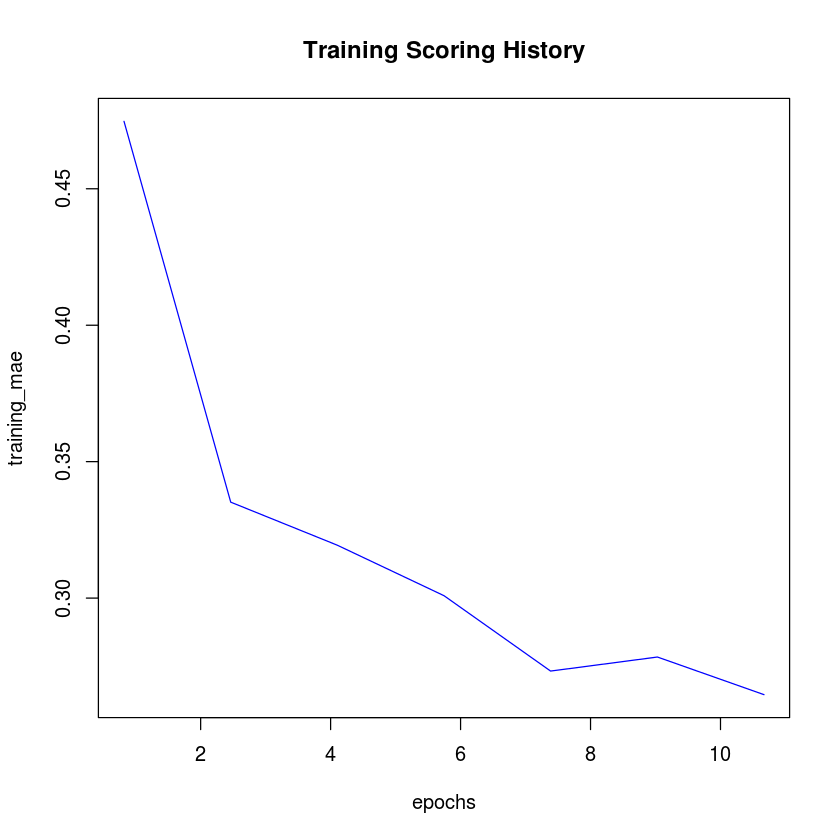

In [19]:
plot(tmodel_full,metric='mae')

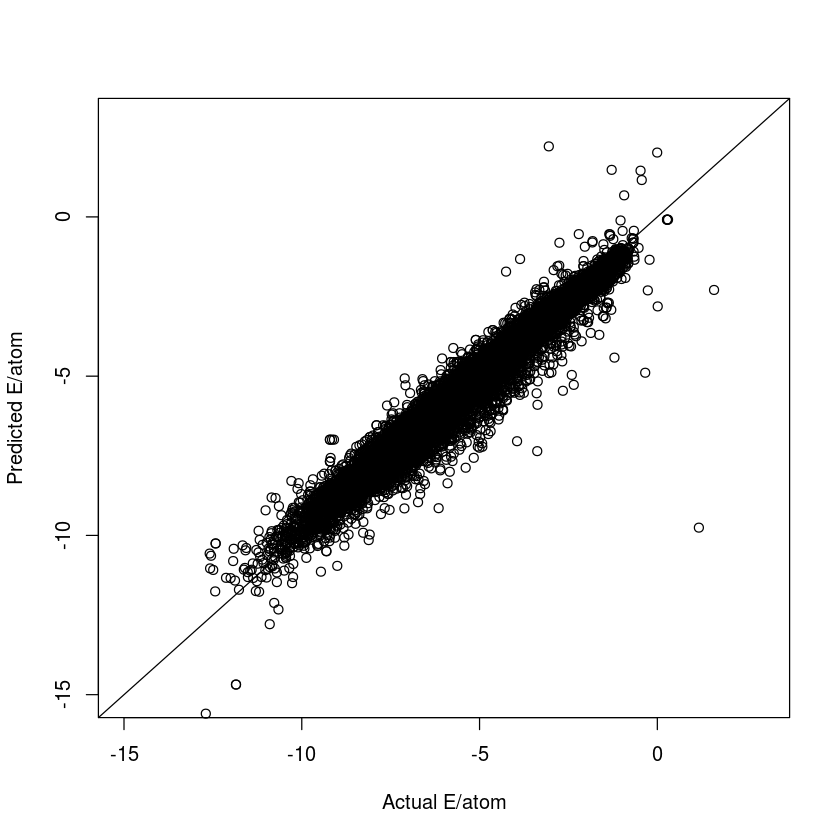

In [20]:
fepa_full <- as.data.frame(testing_frame_full[y.dep])
fepa_full<- as.data.frame(fepa_full)
forecast_y_t_hat_full = tpredicted_full
forecast_y_t_hat_full <- as.data.frame(forecast_y_t_hat_full)


names(fepa_full)[1] <- c("Actual E/atom")
names(forecast_y_t_hat_full) <-c("Predicted E/atom")

vs_full <- cbind(fepa_full, forecast_y_t_hat_full)

plot(vs_full, ylim=c(-15, 3), xlim=c(-15,3))
abline(a=0,b=1)

In [21]:
h2o.varimp(tmodel_full)

variable,relative_importance,scaled_importance,percentage
O,1.0000000,1.0000000,0.05801652
Mg,0.8785434,0.8785434,0.05097004
F,0.4216295,0.4216295,0.02446148
S,0.3507623,0.3507623,0.02035001
Ti,0.2983111,0.2983111,0.01730697
Xe,0.2965660,0.2965660,0.01720573
Zr,0.2881474,0.2881474,0.01671731
Cl,0.2853204,0.2853204,0.01655330
Ne,0.2844113,0.2844113,0.01650056
Kr,0.2807019,0.2807019,0.01628535


같은 파라미터 옵션이라 할지라도 데이터의 양의 증가에 따라 예측 모델의 성능이 향상(MAE:0.375 -> 0.319)되는 것을 확인할 수 있다. 또한 variable_importance 옵션을 사용해 어떤 Features이 결과 값 예측에 많은 영향력을 주었는지를 쉽게 확인해 볼 수 있다.

<hr/>
### 모델 저장과 불러오기
  H2O 패키지는 개발 모델의 저장과 불러오기 함수를 제공한다. h2o.saveModel(), h2o.loadModel()을 사용하는 예제는 다음과 같다.

In [22]:
# save the model to disk
absolute_Path_and_fileName_for_the_Model = h2o.saveModel(tmodel_full, path=paste(currentPath,modelPath, sep=""))

이번 예제에서는 두번째 생성한 모델을 저장하였다. 이를 다시 불러오려면 
1. h2o.loadModel(): 파일에서 로드
2. h2o.getModel(): 현재 Running 중인 H2O Framework cluster에서 Import
등의 함수를 사용하면 된다. 

참고로 라이브러리 호출 후 h2o.init() 대신 h2o.connect()를 이용해서 h2o framework server와 연결한 후 h2o.getModel()을 로드해서 사용할 수도 있다.

예) h2o.connect(ip = "111.111.111.111", port = 54321, context_path = "tutorials")

In [23]:
#check file path and name of the saved model 
absolute_Path_and_fileName_for_the_Model

[1] "/EDISON/LDAP/DATA/edisonadm/docs/materials_data_analysis_tutorials/models/DeepLearning_model_R_1513582449475_3"

In [24]:
# load the model from disk
loaded_tmodel_full = h2o.loadModel(path=absolute_Path_and_fileName_for_the_Model)

In [25]:
loaded_tpredicted_full = h2o.predict(loaded_tmodel_full, testing_frame_full)
tpredicted_full
loaded_tpredicted_full

  |======================================================================| 100%


    predict
1 -4.924549
2 -4.356402
3 -3.592315
4 -5.731237
5 -6.647010
6 -4.087702

[24109 rows x 1 column] 

    predict
1 -4.924549
2 -4.356402
3 -3.592315
4 -5.731237
5 -6.647010
6 -4.087702

[24109 rows x 1 column] 

이전에 생성한 모델과 동일함을 확인하였으니 불러온 모델에 새로운 입력 값을 만들어 예측해보자. Cr2CoO4 의 Final Energy/Atom을 예측 후 기존 학습과 무관한 Materials Project의 VASP 실험 결과 값[[5]](https://materialsproject.org/materials/mp-24868/)과 비교한다.

![fig_comparing_with_mp](./figures/comparing_with_mp.jpg)
<center>[참고: Materials Projects 웹 페이지의 Cr2CoO4 Final Energy per atom]</center>

In [28]:
fileName = "zero_field_test.csv"
zero_field = read.csv(paste(dataPath, fileName, sep=""),sep=",",header=TRUE)
zero_field

zero_field$Cr <- 2
zero_field$Co <- 1
zero_field$O <- 4

sample_testing_frame = as.h2o(zero_field)
output = h2o.predict(loaded_tmodel_full, sample_testing_frame)
output

Ac,Ag,Al,Ar,As,Au,B,Ba,Be,Bi,⋯,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


  |======================================================================| 100%
  |======================================================================| 100%


    predict
1 -6.794441

[1 row x 1 column] 

<hr/>
###### References
[1] Saal, J. E., Kirklin, S., Aykol, M., Meredig, B., and Wolverton, C. "Materials Design and Discovery with High-Throughput Density Functional Theory: The Open Quantum Materials Database (OQMD)", JOM 65, 1501-1509 (2013). doi:10.1007/s11837-013-0755-4 [Link](http://dx.doi.org/10.1007/s11837-013-0755-4)

  [2] Kirklin, S., Saal, J.E., Meredig, B., Thompson, A., Doak, J.W., Aykol, M., Rühl, S. and Wolverton, C. "The Open Quantum Materials Database (OQMD): assessing the accuracy of DFT formation energies", npj Computational Materials 1, 15010 (2015). doi:10.1038/npjcompumats.2015.10 [Link](http://dx.doi.org/10.1038/npjcompumats.2015.10)
  
  [3] H2O.ai Team, H2O website, 2017. URL (http://h2o.ai)
  
  [4] H2o.ai Team, H2O R Package Documentation, 2017. URL (http://h2orelease.s3.amazonaws.com/h2o/latest_stable_Rdoc.html)
  
  [5] Materials Project, web site, URL (https://materialsproject.org/materials/mp-24868/)